In [ ]:
# Step 1: Kaggle API download folder
from google.colab import files
files.upload()  # 👈 It will open some window for upload the .json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sametdemir444","key":"20ee4af6684c6647118743f0157676fd"}'}

In [ ]:
# Step 2: Create necessary folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Step 3: Set permissions
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# GTSRB Dataset – Kaggle url: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Step 4: Download data with Kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 87% 534M/612M [00:10<00:02, 36.2MB/s]
100% 612M/612M [00:10<00:00, 59.8MB/s]


In [ ]:
!unzip -o gtsrb-german-traffic-sign.zip -d gtsrb_data

Streaming output truncated to the last 5000 lines.
  inflating: gtsrb_data/train/5/00005_00053_00010.png  
  inflating: gtsrb_data/train/5/00005_00053_00011.png  
  inflating: gtsrb_data/train/5/00005_00053_00012.png  
  inflating: gtsrb_data/train/5/00005_00053_00013.png  
  inflating: gtsrb_data/train/5/00005_00053_00014.png  
  inflating: gtsrb_data/train/5/00005_00053_00015.png  
  inflating: gtsrb_data/train/5/00005_00053_00016.png  
  inflating: gtsrb_data/train/5/00005_00053_00017.png  
  inflating: gtsrb_data/train/5/00005_00053_00018.png  
  inflating: gtsrb_data/train/5/00005_00053_00019.png  
  inflating: gtsrb_data/train/5/00005_00053_00020.png  
  inflating: gtsrb_data/train/5/00005_00053_00021.png  
  inflating: gtsrb_data/train/5/00005_00053_00022.png  
  inflating: gtsrb_data/train/5/00005_00053_00023.png  
  inflating: gtsrb_data/train/5/00005_00053_00024.png  
  inflating: gtsrb_data/train/5/00005_00053_00025.png  
  inflating: gtsrb_data/train/5/00005_00053_00026.png

In [ ]:
dataset_path = "/content/gtsrb_data/Train"


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X = np.array(image_data)
y = np.array(labels)

# Normalize image data
X = X / 255.0

# One-hot encode the labels
y_encoded = to_categorical(y, num_classes=43)


In [ ]:
!ls /content/gtsrb_data/Train/0 | head -5


00000_00000_00000.png
00000_00000_00001.png
00000_00000_00002.png
00000_00000_00003.png
00000_00000_00004.png


In [ ]:
image_data = []
labels = []

for class_id in tqdm(range(43)):
    folder_path = os.path.join(dataset_path, str(class_id))
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith('.png'):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            image_data.append(img)
            labels.append(class_id)


100%|██████████| 43/43 [00:08<00:00,  5.07it/s]


In [ ]:
X = np.array(image_data)
y = np.array(labels)
print("Loaded images:", X.shape)


Loaded images: (39209, 32, 32, 3)


In [ ]:
# Normalize
X = X / 255.0

# One-hot encode
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y, num_classes=43)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (31367, 32, 32, 3)
Test: (7842, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.2742 - loss: 2.7433 - val_accuracy: 0.8568 - val_loss: 0.6035
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.7535 - loss: 0.7903 - val_accuracy: 0.9471 - val_loss: 0.2344
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.8675 - loss: 0.4345 - val_accuracy: 0.9679 - val_loss: 0.1432
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9021 - loss: 0.3113 - val_accuracy: 0.9758 - val_loss: 0.1180
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.9227 - loss: 0.2484 - val_accuracy: 0.9830 - val_loss: 0.0906
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9403 - loss: 0.1982 - val_accuracy: 0.9852 - val_loss: 0.0652
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9466 - loss: 0.1727 - val_accuracy: 0.9867 - val_loss: 0.0629
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.9535 - loss: 0.1504 - 

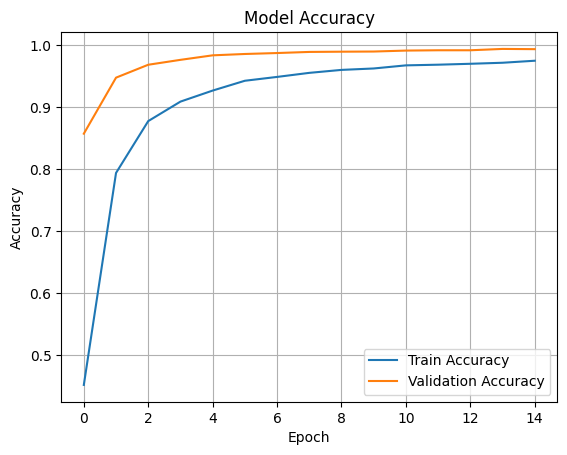

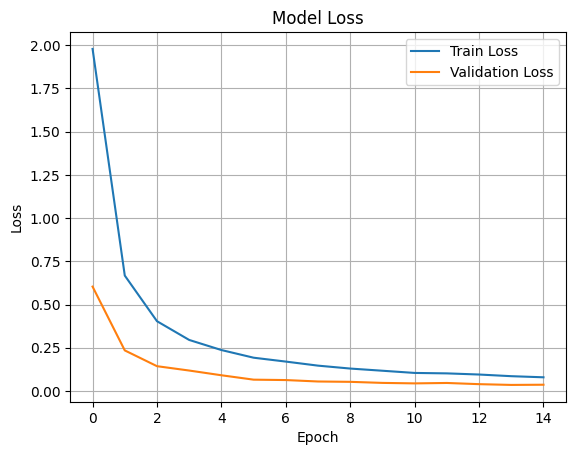

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


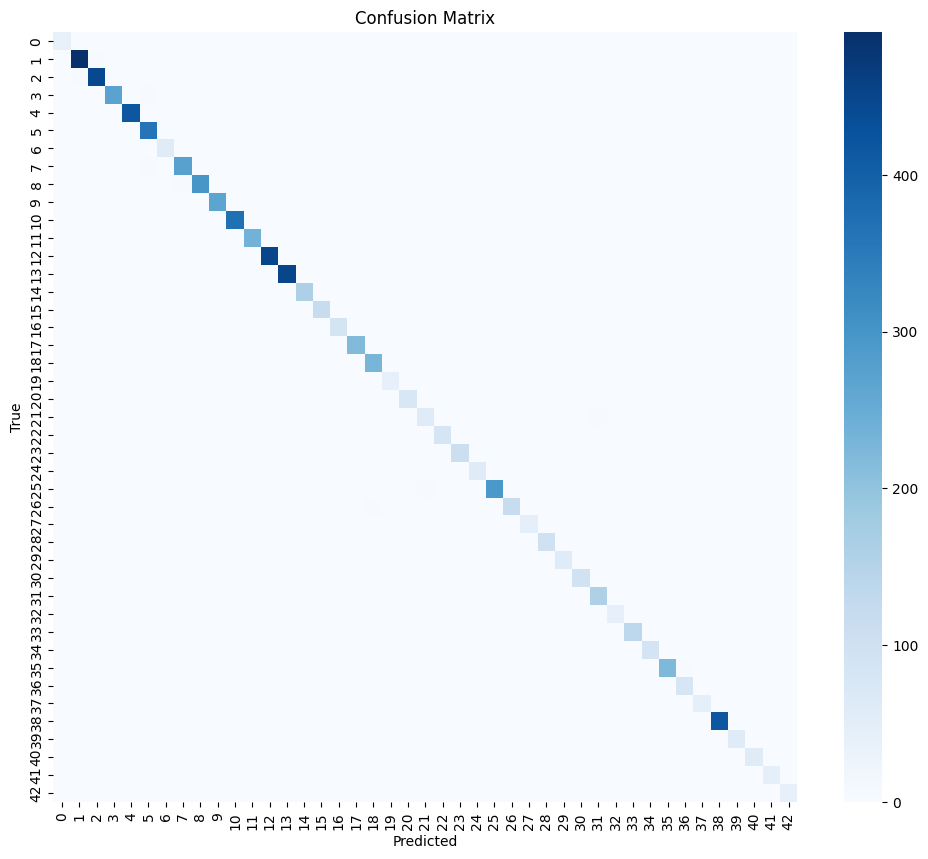

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      0.99      0.99       496
           2       0.99      0.99      0.99       450
           3       0.99      0.97      0.98       280
           4       1.00      1.00      1.00       418
           5       0.98      0.99      0.98       364
           6       1.00      1.00      1.00        59
           7       0.99      0.98      0.99       278
           8       0.99      0.99      0.99       301
           9       0.99      0.99      0.99       268
          10       0.99      1.00      0.99       370
          11       0.99      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       0.99      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      0.99      0.99       120
          16       1.00      1.00      1.00        90
   

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get model predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))


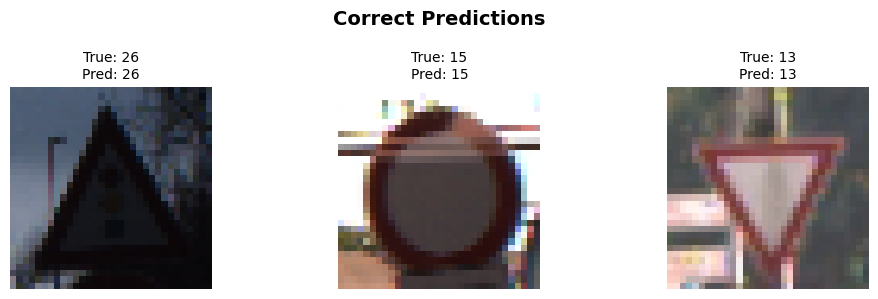

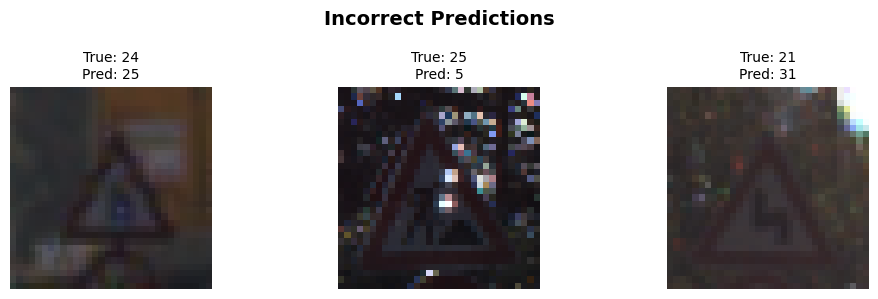

In [ ]:
# Improved 3 correct prediction visuals
plt.figure(figsize=(10, 3))
for i, idx in enumerate(correct_indices[:3]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[idx])
    true_label = y_true_labels[idx]
    pred_label = y_pred_labels[idx]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis('off')
plt.suptitle("Correct Predictions", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Improved 3 wrong guess visuals
plt.figure(figsize=(10, 3))
for i, idx in enumerate(incorrect_indices[:3]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[idx])
    true_label = y_true_labels[idx]
    pred_label = y_pred_labels[idx]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis('off')
plt.suptitle("Incorrect Predictions", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
